In [92]:
# Imports
import numpy as np
from numpy import genfromtxt
import scipy.cluster.vq as vq
import matplotlib.pyplot as plt

## General

In [98]:
# Read CVS files
matX = genfromtxt('./q3dm1-path1.csv', delimiter=',')
# matX = genfromtxt('./q3dm1-path2.csv', delimiter=',')

## Clustering

In [99]:
matM, inds = vq.kmeans2(matX, k=10, iter=100, minit="++")

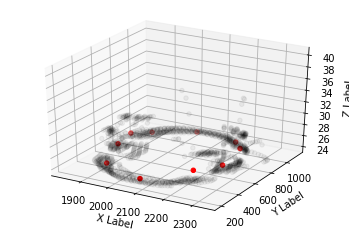

In [100]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot data
ax.scatter(matX[:,1], matX[:,0], matX[:,2], c='black', marker='o', alpha=0.05)

# Plot centroids
ax.scatter(matM[:,1], matM[:,0], matM[:,2], c='red', marker='o')


ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

## Markov Chain estimation

In [101]:
# Transition count matrix
trans_mat = np.zeros((matM.shape[0], matM.shape[0]))

# Populate transition count matrix
for i in range(len(inds) - 1):
    trans_mat[inds[i], inds[i+1]] += 1

trans_mat

array([[113.,   0.,   0.,   0.,   0.,  10.,   0.,   0.,   0.,   0.],
       [  0., 120.,   0.,   0.,   0.,   0.,   0.,  10.,   0.,   0.],
       [  0.,   0., 123.,   0.,   0.,   0.,   0.,   0.,   0.,  10.],
       [  0.,   0.,   0., 130.,  10.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,  10.,   0., 128.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0., 120.,  10.,   0.,   0.,   0.],
       [  0.,   0.,   0.,  10.,   0.,   0., 135.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0., 119.,  10.,   0.],
       [ 10.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 116.,   0.],
       [  0.,  10.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 122.]])

In [102]:
# Transition probability matrix P
P = np.zeros((matM.shape[0], matM.shape[0]))

# Populate transition probability matrix P
for x in range(matM.shape[0]):
    for y in range(matM.shape[0]):
        P[x,y] = trans_mat[x,y] / np.sum(trans_mat[x, :])

# Print matrix
print(np.round(P, 2))

[[0.92 0.   0.   0.   0.   0.08 0.   0.   0.   0.  ]
 [0.   0.92 0.   0.   0.   0.   0.   0.08 0.   0.  ]
 [0.   0.   0.92 0.   0.   0.   0.   0.   0.   0.08]
 [0.   0.   0.   0.93 0.07 0.   0.   0.   0.   0.  ]
 [0.   0.   0.07 0.   0.93 0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.92 0.08 0.   0.   0.  ]
 [0.   0.   0.   0.07 0.   0.   0.93 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.92 0.08 0.  ]
 [0.08 0.   0.   0.   0.   0.   0.   0.   0.92 0.  ]
 [0.   0.08 0.   0.   0.   0.   0.   0.   0.   0.92]]
